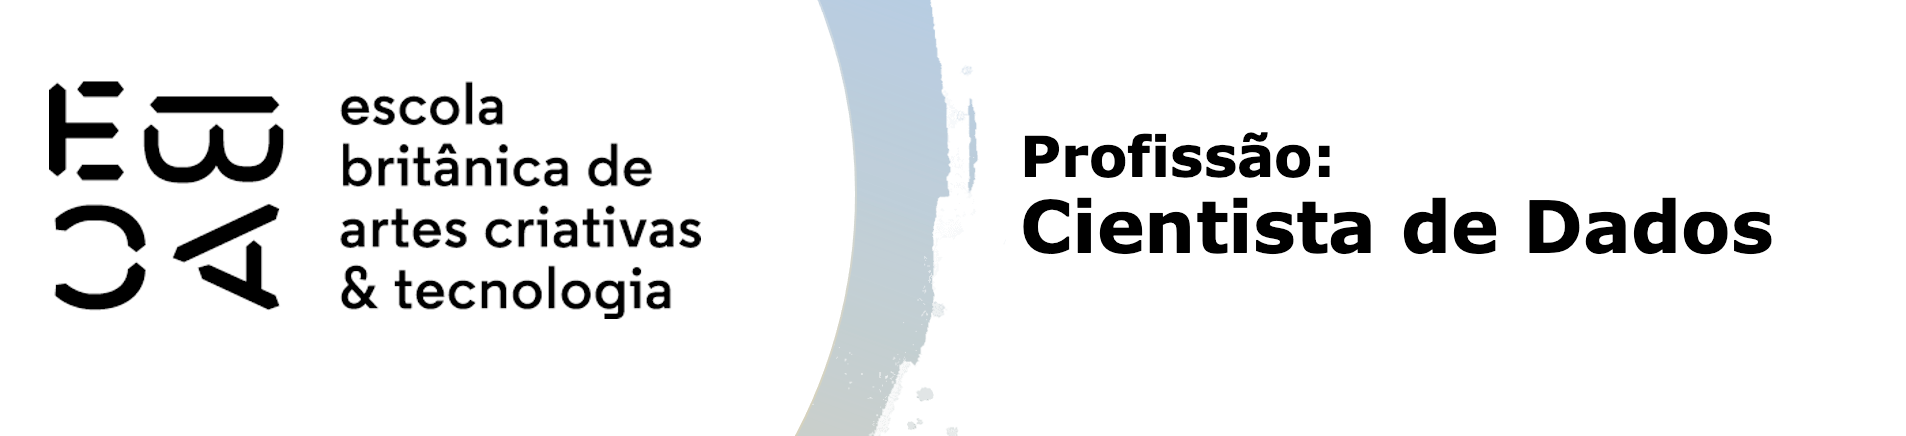

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head(5)

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [3]:
display(df.isna().sum())

CNPJ emit.               0
Emitente                 0
No.                      0
Data Emissão             0
Valor NF                 0
Data Registro            0
Créditos                 0
Situação do Crédito      0
Ano                      0
Semestre                 0
Retorno                980
flag_credito             0
categoria                0
dtype: int64

In [4]:
df['Retorno'].fillna(0,inplace=True)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [5]:
ama = df[(df['Data Registro']>='2020-01-01')].copy()
X_columns=ama.columns.tolist()
X_columns = [s.replace(' ', '_') for s in X_columns]
ama = ama.rename(columns=dict(zip(ama.columns, X_columns)))

In [6]:
tab = pd.crosstab(ama.categoria, ama.flag_credito, margins=True, margins_name='total')
tab

flag_credito,0,1,total
categoria,,,
Alimentos,1609,3452,5061
Auto posto,405,135,540
Construção,8526,7537,16063
Farmácia,6611,3590,10201
Mercado,14388,13196,27584
Restaurantes,553,1637,2190
Varejo,4368,704,5072
Vestuário,1477,443,1920
não definido,11743,6737,18480


In [7]:
tab['retorno_rate'] = tab[1]/tab['total']
tab

flag_credito,0,1,total,retorno_rate
categoria,,,,
Alimentos,1609,3452,5061,0.682079
Auto posto,405,135,540,0.250000
Construção,8526,7537,16063,0.469215
Farmácia,6611,3590,10201,0.351926
Mercado,14388,13196,27584,0.478393
Restaurantes,553,1637,2190,0.747489
Varejo,4368,704,5072,0.138801
Vestuário,1477,443,1920,0.230729
não definido,11743,6737,18480,0.364556


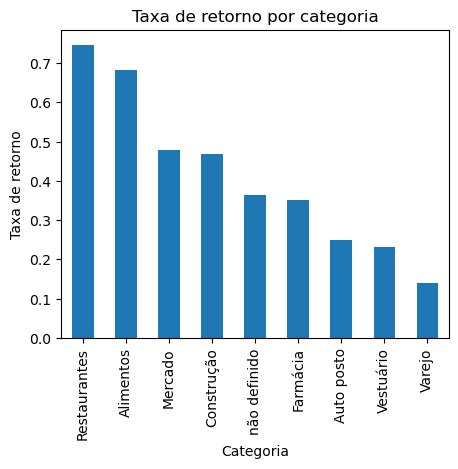

In [8]:
tab.retorno_rate[:-1].sort_values(ascending=False).plot(kind='bar', figsize=(5, 4))
plt.title('Taxa de retorno por categoria')
plt.xlabel('Categoria')
plt.ylabel('Taxa de retorno')
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [9]:
tab['odds'] = tab[1]/tab[0]
tab['odds_ratio'] = tab['odds']/tab.loc['total', 'odds']
tab['woe'] = np.log(tab.odds_ratio)
tab

flag_credito,0,1,total,retorno_rate,odds,odds_ratio,woe
categoria,,,,,,,
Alimentos,1609,3452,5061,0.682079,2.145432,2.847508,1.046444
Auto posto,405,135,540,0.250000,0.333333,0.442414,-0.815509
Construção,8526,7537,16063,0.469215,0.884002,1.173285,0.159807
Farmácia,6611,3590,10201,0.351926,0.543034,0.720738,-0.327480
Mercado,14388,13196,27584,0.478393,0.917153,1.217284,0.196622
Restaurantes,553,1637,2190,0.747489,2.960217,3.928925,1.368366
Varejo,4368,704,5072,0.138801,0.161172,0.213914,-1.542179
Vestuário,1477,443,1920,0.230729,0.299932,0.398083,-0.921095
não definido,11743,6737,18480,0.364556,0.573703,0.761443,-0.272539


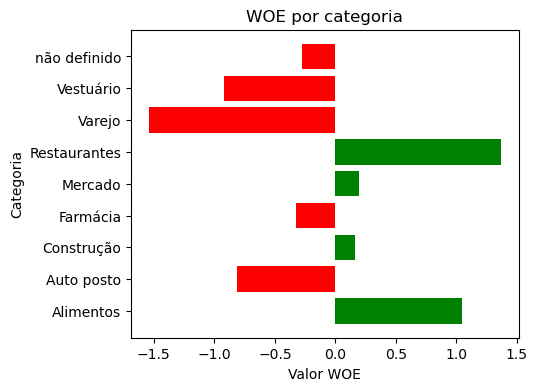

In [10]:
# Gráfico dos valores WOE por categoria
woe_values = tab.woe[:-1].values
categories = tab[:-1].index.tolist()

plt.figure(figsize=(5,4))
plt.barh(categories, woe_values, color=np.where(woe_values<0, 'red', 'green'))
plt.title('WOE por categoria')
plt.xlabel('Valor WOE')
plt.ylabel('Categoria')
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [11]:
tab1 = pd.crosstab(ama.categoria, ama.flag_credito, margins=True, margins_name='total')
rótulo_evento = tab1.columns[1]
rótulo_nao_evento = tab1.columns[0]

tab1['pct_evento'] = tab1[rótulo_evento]/tab1.loc['total',rótulo_evento]
tab1['pct_nao_evento'] = tab1[rótulo_nao_evento]/tab1.loc['total',rótulo_nao_evento]
tab1['woe'] = np.log(tab1.pct_evento/tab1.pct_nao_evento)
tab1['iv_parcial'] = (tab1.pct_evento - tab1.pct_nao_evento)*tab1.woe
print(tab1.iv_parcial.sum())
tab1

0.2786678082561656


flag_credito,0,1,total,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,
Alimentos,1609,3452,5061,0.092223,0.032387,1.046444,0.062615
Auto posto,405,135,540,0.003607,0.008152,-0.815509,0.003707
Construção,8526,7537,16063,0.201357,0.171618,0.159807,0.004752
Farmácia,6611,3590,10201,0.095910,0.133072,-0.327480,0.012170
Mercado,14388,13196,27584,0.352542,0.289614,0.196622,0.012373
Restaurantes,553,1637,2190,0.043734,0.011131,1.368366,0.044612
Varejo,4368,704,5072,0.018808,0.087923,-1.542179,0.106587
Vestuário,1477,443,1920,0.011835,0.029730,-0.921095,0.016483
não definido,11743,6737,18480,0.179985,0.236373,-0.272539,0.015368


In [12]:
# Definindo variáveis e atribuição de papéis para o metadados
if all(col in ama.columns for col in ['categoria','CNPJ_emit.', 'Emitente', 'No.', 'Data_Emissão','Data_Registro','Ano','Situação_do_Crédito']):
    ama.drop(columns=['categoria','CNPJ_emit.', 'Emitente', 'No.', 'Data_Emissão','Data_Registro','Ano','Situação_do_Crédito'], inplace=True)

metadados = pd.DataFrame({'dtype':ama.dtypes})
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito','papel'] = 'resposta'
metadados['nunique'] = ama.nunique()
metadados

,dtype,papel,nunique
Valor_NF,float64,covariavel,28402
Créditos,float64,covariavel,7865
Semestre,int64,covariavel,2
Retorno,float64,covariavel,35946
flag_credito,int64,resposta,2


In [13]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [14]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'nunique']>5):
        metadados.loc[var, 'IV'] = IV(pd.qcut(ama[var],5,duplicates='drop'), ama.flag_credito)
    else: 
        metadados.loc[var, 'IV'] = IV(ama[var], ama.flag_credito)
    
metadados

,dtype,papel,nunique,IV
Valor_NF,float64,covariavel,28402,0.039297
Créditos,float64,covariavel,7865,inf
Semestre,int64,covariavel,2,0.005139
Retorno,float64,covariavel,35946,inf
flag_credito,int64,resposta,2,NaN


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


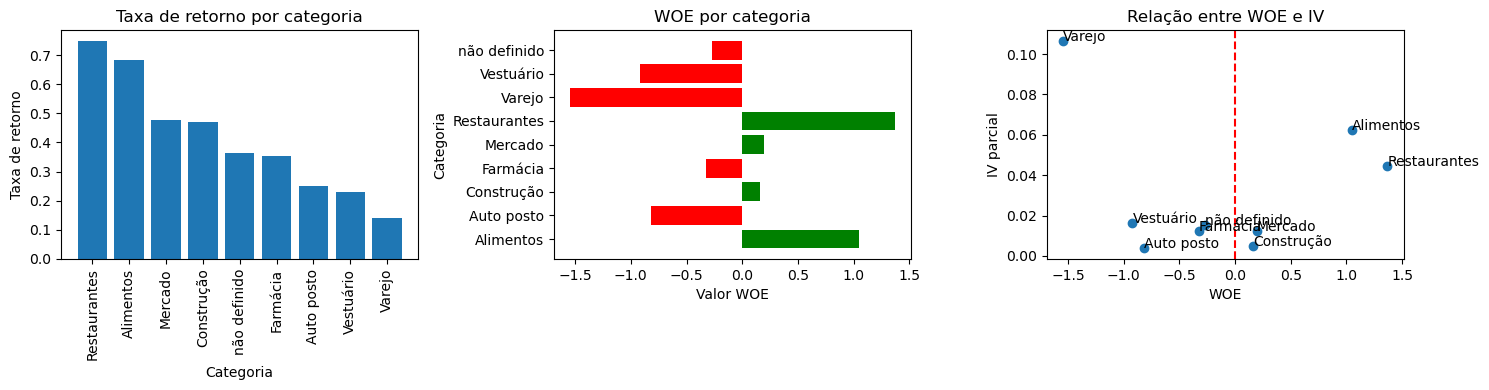

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Primeiro gráfico
retorno_rate = tab.retorno_rate[:-1].sort_values(ascending=False)
axs[0].bar(retorno_rate.index, retorno_rate)
axs[0].set_title('Taxa de retorno por categoria')
axs[0].set_xlabel('Categoria')
axs[0].set_ylabel('Taxa de retorno')
axs[0].set_xticklabels(retorno_rate.index, rotation=90)

# Segundo gráfico
woe_values = tab.woe[:-1].values
categories = tab[:-1].index.tolist()
axs[1].barh(categories, woe_values, color=np.where(woe_values<0, 'red', 'green'))
axs[1].set_title('WOE por categoria')
axs[1].set_xlabel('Valor WOE')
axs[1].set_ylabel('Categoria')

# Terceiro gráfico
woe_values = tab1.woe[:-1].values
iv_values = tab1.iv_parcial[:-1].values
axs[2].axvline(x=0, linestyle='--', color='red')
axs[2].scatter(woe_values, iv_values)
axs[2].set_title('Relação entre WOE e IV')
axs[2].set_xlabel('WOE')
axs[2].set_ylabel('IV parcial')
categorias = tab1[:-1].index.values
for i, categorias in enumerate(categorias):
    axs[2].annotate(categorias, (woe_values[i], iv_values[i]))
    
plt.tight_layout()
plt.show()    

### Conclusão
Com base nos valores de WOE e IV_parcial, podemos observar que as categorias com os maiores valores de WOE (ou seja, as mais favoráveis ao target) são <font color='blue'>**Restaurantes**</font> e <font color='blue'>**Alimentos**</font>, enquanto as categorias com os menores valores de WOE (ou seja, as menos favoráveis ao target) são <font color='red'>**Varejo**</font> e <font color='red'>**Vestuário**</font> _(Gráfico 3)_.

Por outro lado, as categorias com os maiores valores de IV_parcial são <font color='blue'>**Varejo**</font> e <font color='blue'>**Alimentos**</font>, enquanto as categorias com os menores valores de IV_parcial são <font color='red'>**Auto posto**</font> e <font color='red'>**Construção**</font> e .

Levando em consideração tanto os valores de WOE quanto os de IV_parcial, pode ser interessante selecionar as categorias que apresentam altos valores em ambas as métricas. Nesse caso, as categorias <font color='blue'>**Alimentos**</font> e <font color='blue'>**Varejo**</font> se destacam, já que ambas têm valores relativamente altos tanto de WOE quanto de IV_parcial. Porém,  a categoria <font color='red'>**Varejo**</font> foi a que apresentou a menor taxa de retorno devendo, portanto, ser desconsiderada _(Gráfico 1)_.

É importante lembrar que a escolha do conjunto de categorias depende do objetivo do modelo e do contexto específico em que ele será aplicado. É possível que outras combinações de categorias sejam mais relevantes em diferentes cenários.